# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [4]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Renda Anual (Segundo vídeo aula).

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [7]:
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [9]:
# Converti a coluna 'Income' para float para manter os valores de renda corretos com casas decimais.
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype('float64')

In [13]:
df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [16]:
df.isnull().values.any()

True

In [18]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [20]:
df['Age'].mean()

37.50769230769231

In [22]:
df['Age'].median()

36.0

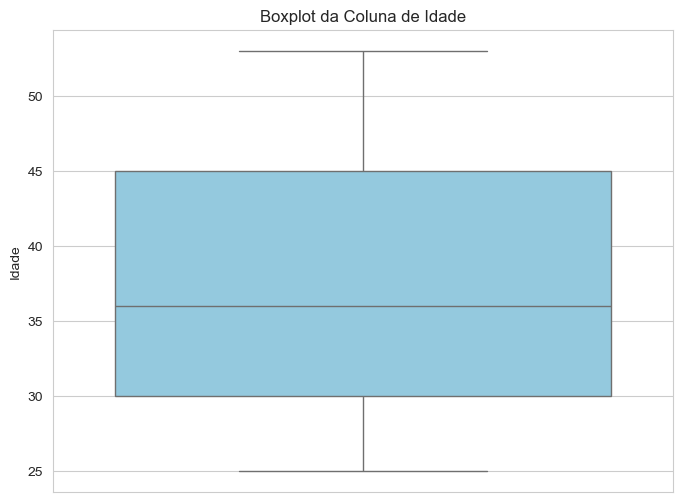

In [24]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age', color='skyblue')
plt.title('Boxplot da Coluna de Idade')
plt.ylabel('Idade')
plt.show()

In [26]:
# Após checar a média, a mediana e verificar o gráfico de Boxplot sem outliers, optei em substituir pela mediana, por trazer um resultado sem decimais.
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18508\2868461757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [28]:
df['Age'].isnull().sum()

0

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [31]:
# Todos os valores estão corretos.
df.apply(lambda col: col.unique())

Age                   [25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 26.0, 31....
Gender                                                   [Female, Male]
Income                [50000.0, 100000.0, 75000.0, 125000.0, 150000....
Education             [Bachelor's Degree, Master's Degree, Doctorate...
Marital Status                                        [Single, Married]
Number of Children                                         [0, 2, 1, 3]
Home Ownership                                          [Rented, Owned]
Credit Score                                       [High, Average, Low]
dtype: object

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [34]:
# Como a idade já foi analisada anteriormente, sabemos que não existem outliers.
# Restam dúvidas no income, vou plotar o gráfico, mas os dados do describe não assustam.
# E dúvida sobre o número de filhos, apenas da média ser 0, o máximo ser 3 pode assustar.
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


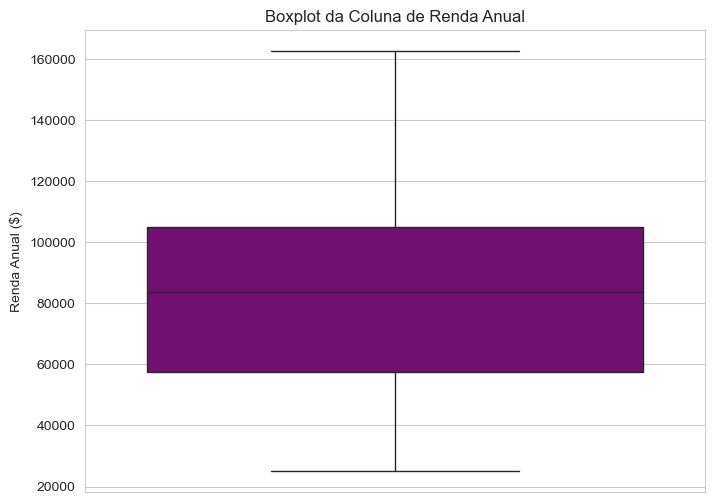

In [36]:
# Como apresentado pela função describe, os valores possuem uma leve assimetria para os valores mais altos, porém sem a presença de outliers.
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Income', color='purple')
plt.title('Boxplot da Coluna de Renda Anual')
plt.ylabel('Renda Anual ($)')
plt.show()

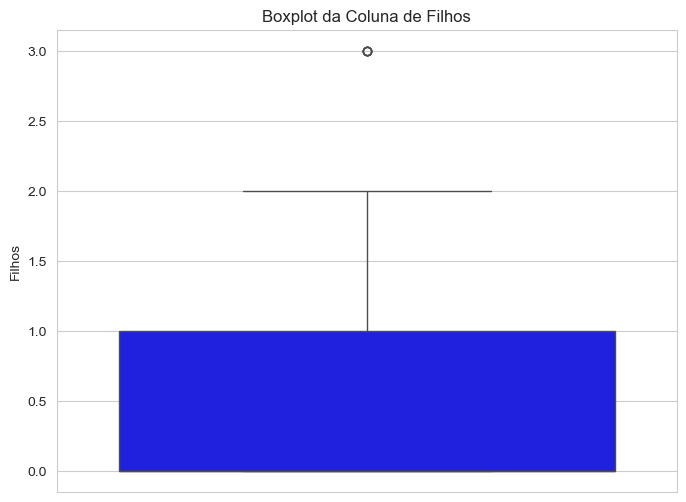

In [38]:
# A maioria dos clientes não possui filhos. Clientes com 3 filhos foram identificados como outliers, mas são válidos no contexto dos dados.
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Number of Children', color='blue')
plt.title('Boxplot da Coluna de Filhos')
plt.ylabel('Filhos')
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

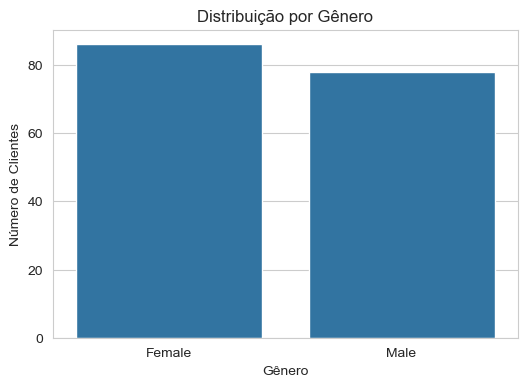

In [41]:
# A maioria dos clientes são mulheres. Mas a distribuição é proporcionalmente equilibrada.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

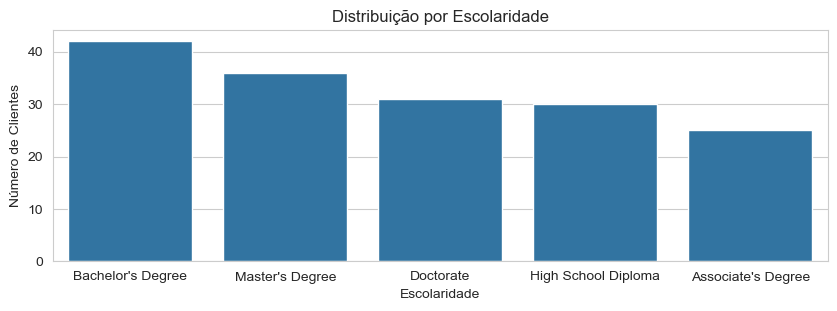

In [43]:
# Grande parte dos clientes possuem nível superior.
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='Education')
plt.title('Distribuição por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Clientes')
plt.show()

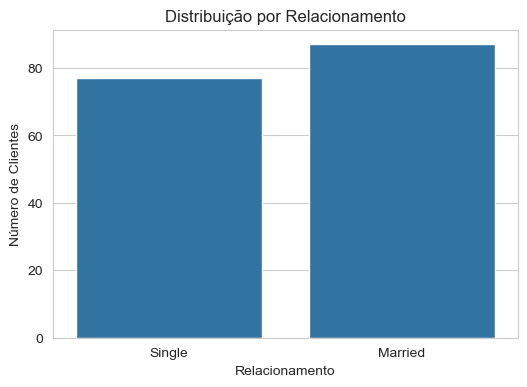

In [45]:
# A maior parte dos clientes são casados. Mas a distribuição é proporcionalmente equilibrada.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital Status')
plt.title('Distribuição por Relacionamento')
plt.xlabel('Relacionamento')
plt.ylabel('Número de Clientes')
plt.show()

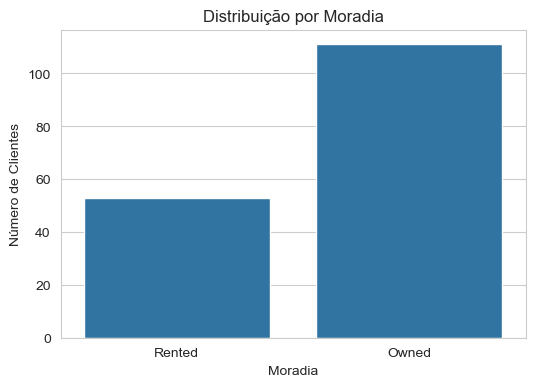

In [47]:
# A maioria dos clientes possui casa própria, quase o dobro dos que alugam, sem comprometer a representatividade da base.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Home Ownership')
plt.title('Distribuição por Moradia')
plt.xlabel('Moradia')
plt.ylabel('Número de Clientes')
plt.show()

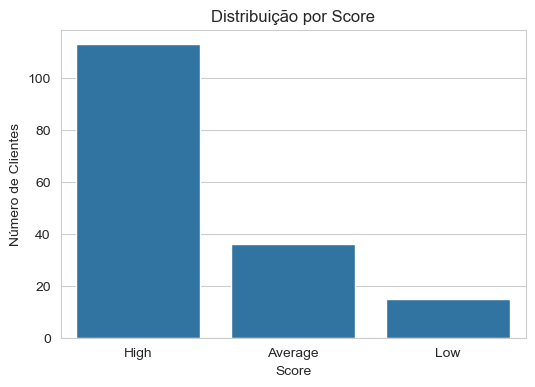

In [49]:
# A maioria dos clientes possui score alto, o que favorece a aprovação de crédito.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit Score')
plt.title('Distribuição por Score')
plt.xlabel('Score')
plt.ylabel('Número de Clientes')
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [52]:
# Após análise das variáveis numéricas e categóricas, foi identificado apenas um possível outlier na variável "Number of Children". 
# No entanto, este valor é plausível dentro do contexto. Enquanto nas variáveis categóricas, todas estão praticamente equilibradas, apenas a coluna
# de Score que tende mais para o lado High, mas não posso considerar como um outlier. Então não tratei nenhum dado.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



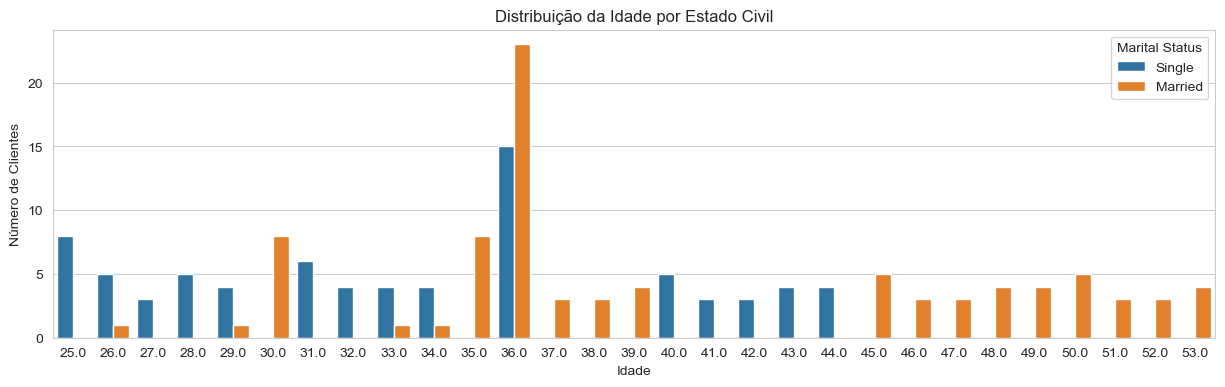

In [55]:
# "Existe relação entre a idade e o status civil?"
# Resposta: A maioria dos clientes mais jovens tende a ser solteira, enquanto entre os clientes mais velhos há uma predominância de casados. 
#           A partir dos 40 anos, quase todos os clientes são casados.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='Age', hue='Marital Status')
plt.title('Distribuição da Idade por Estado Civil')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.show()

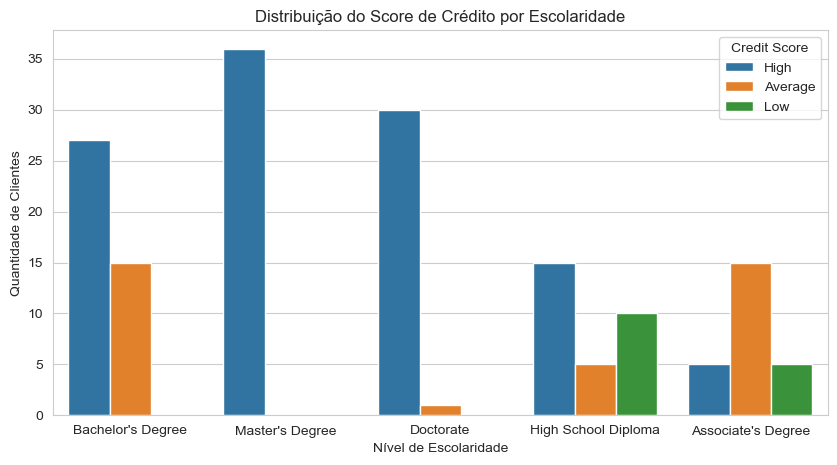

In [56]:
# Qual a relação entre o score de crédito e o nível de escolaridade?
# Resposta: Observa-se que clientes com níveis mais elevados de escolaridade tendem a concentrar maiores proporções de score de crédito alto, 
#           enquanto clientes com apenas Ensino Médio ou Tecnólogo (está correto?) apresentam maior proporção de scores médios e baixos.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Education', hue='Credit Score')
plt.title('Distribuição do Score de Crédito por Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Quantidade de Clientes')
plt.show()

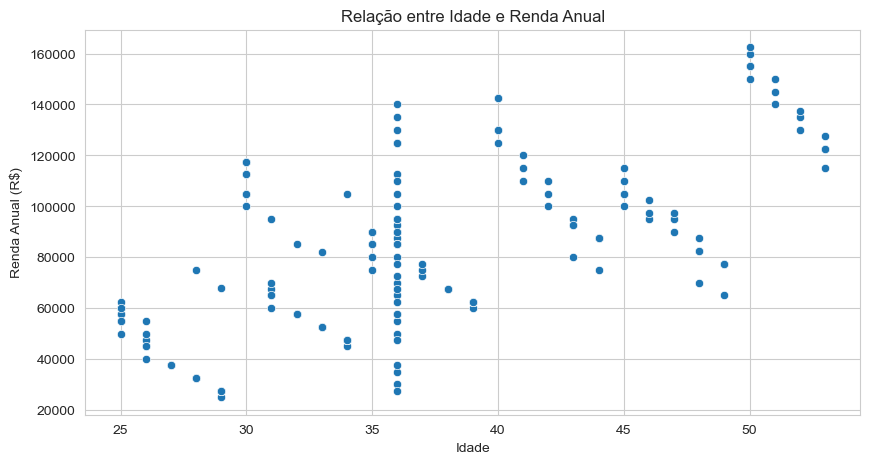

In [58]:
# O salário parece influenciar na idade?
# Resposta: A análise de dispersão mostra uma leve tendência de aumento da renda com a idade, embora exista uma grande dispersão de valores. 
#           Clientes mais velhos tendem, em média, a apresentar rendas maiores, mas a relação não é totalmente linear ou forte.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Relação entre Idade e Renda Anual')
plt.xlabel('Idade')
plt.ylabel('Renda Anual (R$)')
plt.show()

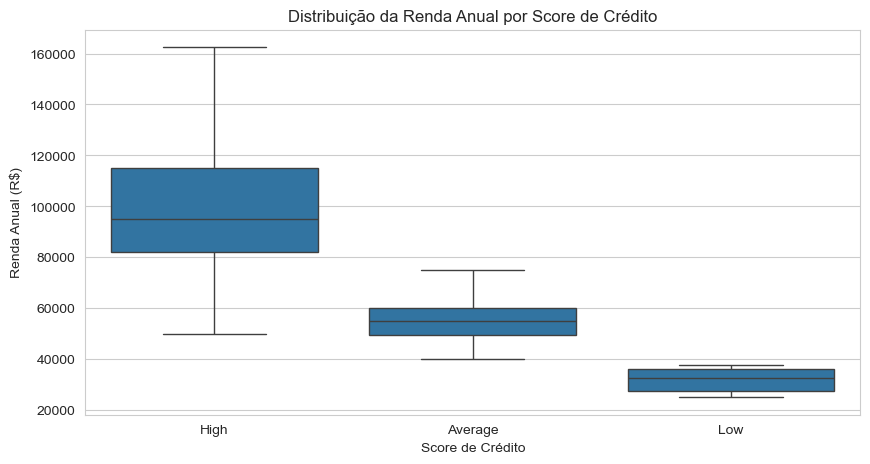

In [59]:
# O salário parece influenciar no Score de Crédito?
# Resposta: Clientes com Score de Crédito Alto apresentam rendas significativamente maiores do que aqueles com Score Médio e Baixo. 
#           No entanto, observa-se também uma maior variação de renda entre os clientes de Score Alto, indicando que apesar da tendência positiva, 
#           a renda sozinha não é o único fator determinante para o Score de Crédito.
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Credit Score', y='Income')
plt.title('Distribuição da Renda Anual por Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Renda Anual (R$)')
plt.show()

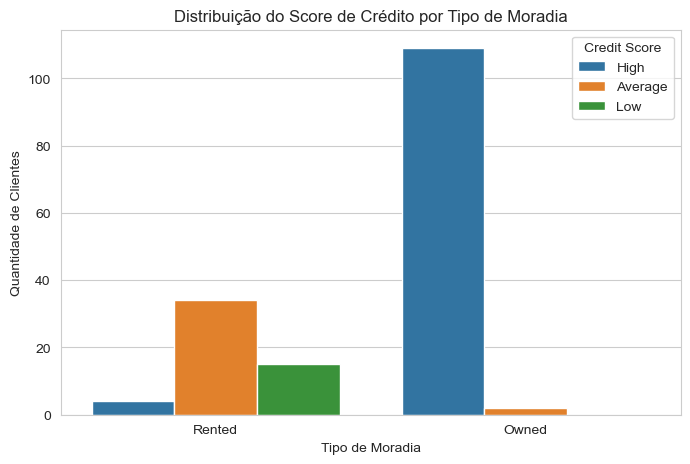

In [61]:
# Clientes com casa própria tendem a ter um score mais alto?
# Resposta: Quem possui a casa própria têm maior concentração de Scores Altos, enquanto clientes que vivem em imóveis alugados possuem maior 
#           proporção de Scores Médios e Baixos. Isso sugere que possuir casa própria pode influenciar positivamente o Score de Crédito.
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Home Ownership', hue='Credit Score')
plt.title('Distribuição do Score de Crédito por Tipo de Moradia')
plt.xlabel('Tipo de Moradia')
plt.ylabel('Quantidade de Clientes')
plt.show()

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

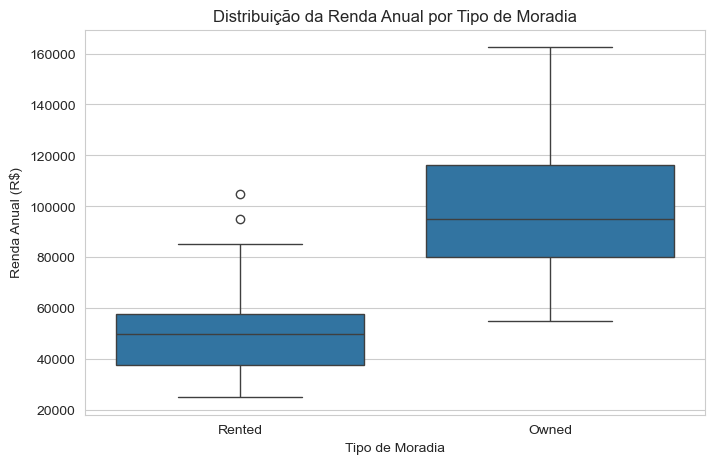

In [66]:
# A renda influencia na posse de casa própria?
# Resposta: Clientes que possuem casa própria tendem a apresentar rendas anuais mais elevadas, enquanto aqueles que vivem em imóveis alugados, 
#           em geral, possuem rendas menores, com exceção de alguns casos isolados (outliers).
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Home Ownership', y='Income')
plt.title('Distribuição da Renda Anual por Tipo de Moradia')
plt.xlabel('Tipo de Moradia')
plt.ylabel('Renda Anual (R$)')
plt.show()

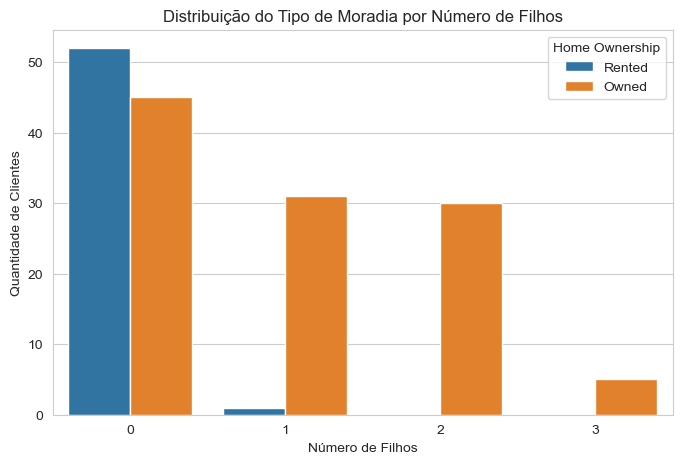

In [68]:
# Número de Filhos influencia no Tipo de Moradia?
# Resposta: Clientes com filhos tendem majoritariamente a possuir casa própria, enquanto entre os clientes sem filhos há uma divisão mais 
#           equilibrada entre aluguel e casa própria. Isso sugere que o aumento da família está associado à busca por estabilidade residencial.
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Number of Children', hue='Home Ownership')
plt.title('Distribuição do Tipo de Moradia por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Quantidade de Clientes')
plt.show()

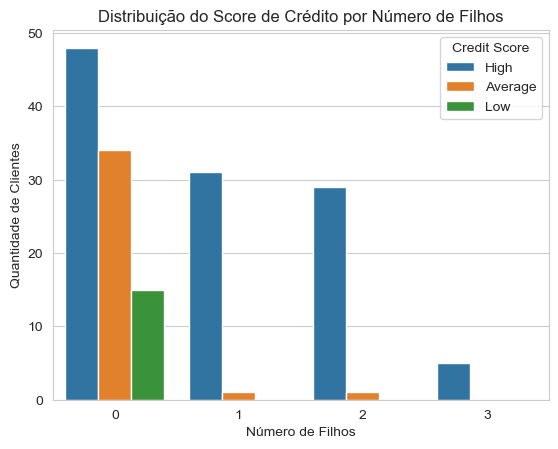

In [70]:
# O número de filhos influencia no Score de Crédito?
# Resposta: Apesar dos clientes sem filhos concentrarem a maior quantidade de registros, são eles que apresentam a maior variação de scores, 
#          incluindo a única presença de Scores Baixos. A partir do momento em que os clientes têm filhos, o Score se torna predominantemente Alto, 
#          com ausência de Scores Baixos.
sns.countplot(data=df, x='Number of Children', hue='Credit Score')
plt.title('Distribuição do Score de Crédito por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

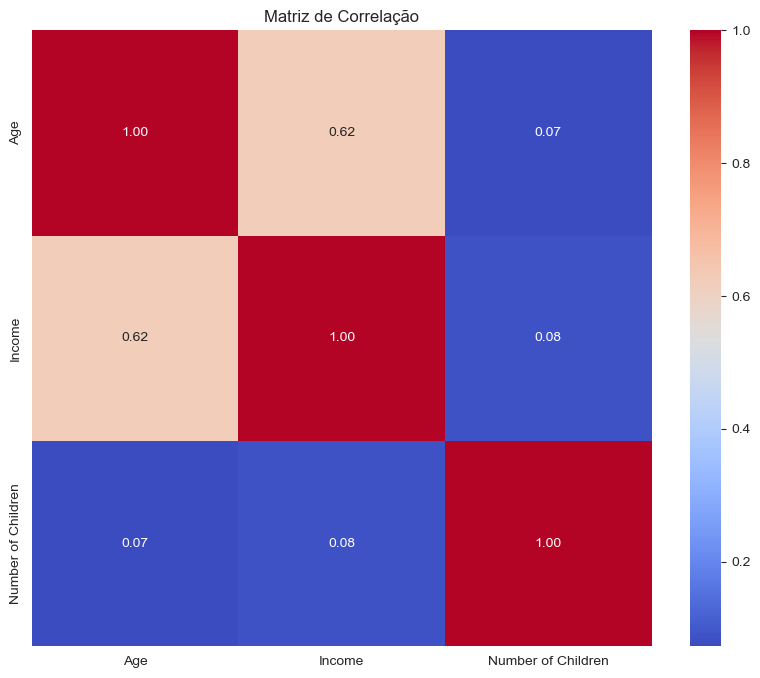

In [73]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [76]:
# Resposta: Sim, foi encontrada uma correlação moderada entre Age e Income (0,62). Isso faz sentido, pois é comum que pessoas mais velhas 
#           tenham maior renda devido à progressão na carreira. As outras variáveis apresentaram correlação fraca.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [75]:
# Label Encoder para as categorias de Gênero, Relacionamento, Casa Própria e a principal Score.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['MaritalStatus_encoded'] = label_encoder.fit_transform(df['Marital Status'])
df['Home Ownership_encoded'] = label_encoder.fit_transform(df['Home Ownership'])

#Especial, pois será a única coluna em que o label irá apresentar grau de importância, precisei de ajuda da IA, pois ficou fora de ordem.
score_mapping = {'Low': 0, 'Average': 1,'High': 2}
df['Credit Score_encoded'] = df['Credit Score'].map(score_mapping)

In [77]:
# Excluindo as colunas antigas
df = df.drop(['Gender'], axis=1)
df = df.drop(['Marital Status'], axis=1)
df = df.drop(['Home Ownership'], axis=1)
df = df.drop(['Credit Score'], axis=1)

In [79]:
# Agora o One Hot para as categorias de Educação.
# Para a coluna de Educação, não irei dar drop_first=True pois existem vários resultados.
df = pd.get_dummies(df, columns=['Education'], prefix='Education')

In [81]:
# Aqui transformo as colunas de booleana em números inteiros
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [83]:
df.dtypes

Age                              float64
Income                           float64
Number of Children                 int64
Gender_encoded                     int32
MaritalStatus_encoded              int32
Home Ownership_encoded             int32
Credit Score_encoded               int64
Education_Associate's Degree       int32
Education_Bachelor's Degree        int32
Education_Doctorate                int32
Education_High School Diploma      int32
Education_Master's Degree          int32
dtype: object

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

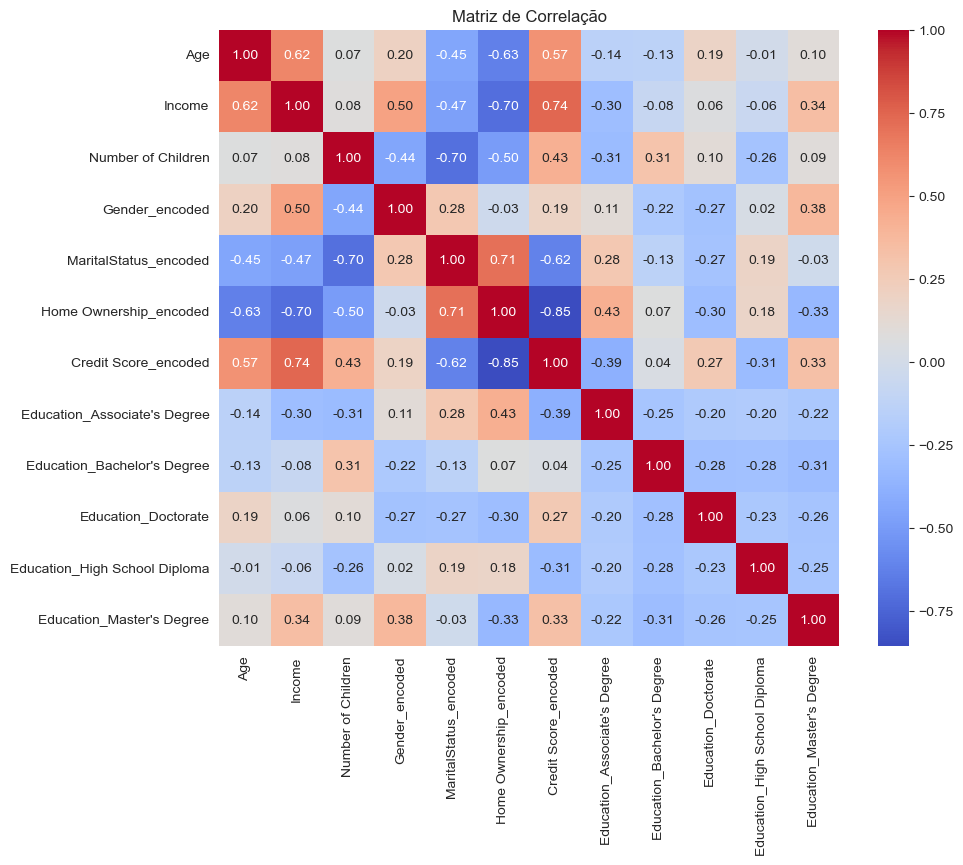

In [85]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

Além da forte correlação entre Home Ownership_encoded e Credit Score_encoded (-0,85), destacam-se:

- Income com Credit Score_encoded (0,74);

- Income com Age (0,62);

- Age com Credit Score_encoded (0,57);

- Number of Children com Credit Score_encoded (0,43);

- Gender_encoded com Credit Score_encoded (0,39).

Essas correlações fazem sentido e refletem padrões sociais e financeiros, com a renda, a idade e a posse de imóvel sendo os principais fatores associados ao score de crédito.

OBS: Inicialmente, as variáveis categóricas foram transformadas usando One-Hot Encoding, o que proporcionou uma visualização mais clara das correlações no heatmap. No entanto, visando a etapa de Machine Learning e a necessidade de reduzir a dimensionalidade do conjunto de dados, optei por utilizar Label Encoding para a variável do Score, realizando um mapeamento manual no caso do Credit Score para preservar a ordem lógica (Low → Medium → High).

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [87]:
X = df.drop('Credit Score_encoded', axis=1)
y = df['Credit Score_encoded']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (123, 11)
Tamanho de X_test: (41, 11)
Tamanho de y_train: (123,)
Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score_encoded'>

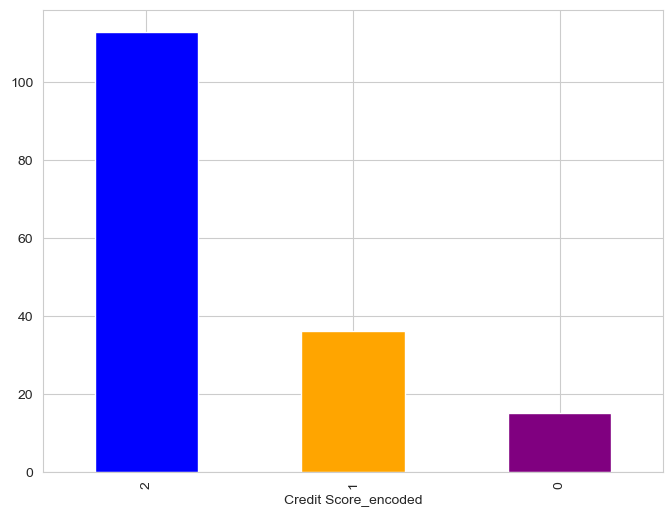

In [92]:
# É necessário um balanceamento, principalmente pelo fator que os clientes que possuem um score alto, irão deixar a base enviesada.
Score_counts = df['Credit Score_encoded'].value_counts()
plt.figure(figsize=(8, 6))
Score_counts.plot(kind='bar', color=['blue', 'orange', 'purple'])

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribuição dos scores após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição dos scores após o balanceamento:
Credit Score_encoded
1    84
0    84
2    84
Name: count, dtype: int64


In [104]:
X_train.to_csv('X_train_final.csv', index=False)
X_test.to_csv('X_test_final.csv', index=False)
y_train.to_csv('y_train_final.csv', index=False)
y_test.to_csv('y_test_final.csv', index=False)

In [96]:
X_train_balanced.to_csv('X_train_final_balanced.csv', index=False)
y_train_balanced.to_csv('y_train_final_balanced.csv', index=False)